In [164]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division

In [165]:
exp1 = np.fromfile('/home/sergey/Documents/Raw/Concave/Magnetic Field/1st_Plateau_B-sweep +-100mT_Lens-steps_sd=-7.5mV Detector Current_Matrix.txt',dtype=float,count=-1, sep=" ")
bf1 = np.fromfile('/home/sergey/Documents/Raw/Convex/Offset @ Emitter&Detector Ithaco/B+-100mT_steps_Lens sweep_3rd plateau_Emitter+500nA_Detector_-7.2nA Detector Current_Matrix.txt',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('/home/sergey/Documents/Raw/Concave/Magnetic Field/2nd_Plateau_full',dtype=float,count=-1, sep=" ")
exp3 = np.fromfile('/home/sergey/Documents/Raw/Concave/Magnetic Field/3rd_Plateau_B-sweep +-100mT_Lens-steps_sd=-1mV_-2V_to_0_81 steps_(25mV_stepsize) Detector Current_Matrix.txt',dtype=float,count=-1, sep=" ")

In [166]:
exp2.shape

(99099,)

In [167]:
bf1.ndim
bf1 = np.reshape(bf1, (204, -1))
exp1 = np.reshape(exp1, (82, -1))
bf1=bf1.transpose()
exp2 = np.reshape(exp2, (99, 1001))
exp3 = np.reshape(exp3, (81, -1))


In [168]:
bf1[203,269]

IndexError: index 269 is out of bounds for axis 1 with size 204

In [169]:
exp2.shape

(99, 1001)

In [170]:
#bf1=bf1[:,150:]
            

In [171]:
#bf2=np.gradient(bf1)
p=plt.imshow(bf2[0],interpolation='sinc', aspect='auto', extent=[-2,0.7,-60,60])
plt.colorbar()
plt.xlim(-2,0.7)
plt.ylim(-20,20)
plt.xlabel("Lense voltage (V)")
plt.ylabel("B (T)")


NameError: name 'bf2' is not defined

In [192]:
exp1g=np.gradient(exp1)
exp2g=np.gradient(exp2)
exp3g=np.gradient(exp3)

In [193]:
exp1g[0]

array([[  1.43420000e-10,   1.42819000e-10,   1.54244000e-10, ...,
         -7.82400000e-12,  -5.03700000e-12,  -1.26580000e-11],
       [  9.16550000e-11,   9.56040000e-11,   9.32195000e-11, ...,
         -2.16500000e-12,  -6.76250000e-12,  -7.76500000e-12],
       [  2.60915000e-11,   3.38025000e-11,   2.50520000e-11, ...,
         -8.01100000e-12,  -1.41525000e-11,  -7.16450000e-12],
       ..., 
       [ -1.11405000e-11,  -1.09535000e-11,  -1.61510000e-11, ...,
          1.02190000e-11,   2.76500000e-12,   2.45950000e-12],
       [  5.25700000e-12,   5.05900000e-12,   9.86000000e-13, ...,
          3.07965000e-11,   3.22160000e-11,   2.74365000e-11],
       [  1.42010000e-11,   1.50800000e-11,   2.78010000e-11, ...,
          2.84550000e-11,   3.39740000e-11,   3.74900000e-11]])

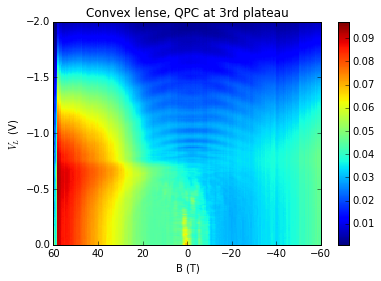

In [224]:
p=plt.imshow(-bf1.squeeze()*25812.807/3E-3,interpolation='none', aspect='auto', extent=[60,-60,0.7,-2])

plt.colorbar()
plt.ylim(0,-2)
#plt.xlim(-15,15)
plt.ylabel("$V_L$ (V)")
plt.xlabel("B (T)")
plt.title('Convex lense, QPC at 3rd plateau')
#plt.contour(bf1,20,  extent=[12,-20,-2,0.7], )
plt.savefig('/home/sergey/Documents/bcx', format='pdf')

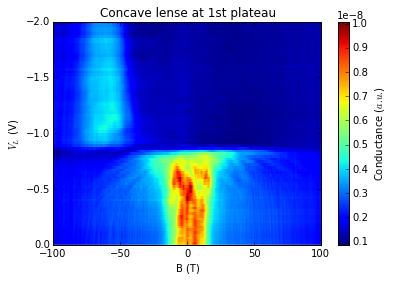

In [228]:
p=plt.imshow(exp1, interpolation='none', aspect='auto',extent=[-100,100,0,-2])
plt.colorbar(label='Conductance ($a.u.$)')

#plt.ylim(-0.9,-2)
#plt.xlim(-60,60)
plt.ylabel("$V_L$ (V)")
plt.xlabel("B (T)")
plt.title('Concave lense at 1st plateau') 

#plt.contour(bf1,20,  extent=[12,-20,-2,0.7], )
plt.savefig('/home/sergey/Documents/bf1', format='pdf')

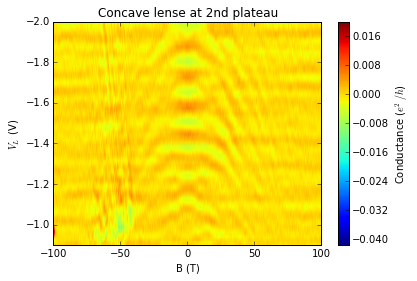

In [229]:
p=plt.imshow(exp2g[0]*25812.807/1E-3,interpolation='sinc', aspect='auto', extent=[-100,100,0.5,-2], vmax=0.02 )

plt.colorbar(label='Conductance ($e^2/h$)')
plt.ylim(-0.9,-2)
#plt.xlim(-60,60)
plt.ylabel("$V_L$ (V)")
plt.xlabel("B (T)")
plt.title('Concave lense at 2nd plateau') 
#plt.contour(bf1,20,  extent=[12,-20,-2,0.7], )
plt.savefig('/home/sergey/Documents/bf2', format='pdf')

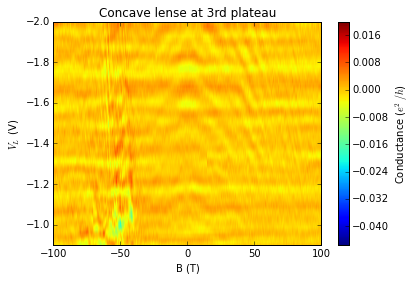

In [199]:
p=plt.imshow(exp3g[0]*25812.807/1E-3,interpolation='sinc', aspect='auto', extent=[-100,100,0,-2], vmax=0.02 )

plt.colorbar(label='Conductance ($e^2/h$)')
plt.ylim(-0.9,-2)
#plt.xlim(-60,60)
plt.ylabel("$V_L$ (V)")
plt.xlabel("B (T)")
plt.title('Concave lense at 3rd plateau') 
#plt.contour(bf1,20,  extent=[12,-20,-2,0.7], )
plt.savefig('/home/sergey/Documents/bf3', format='pdf')

In [1277]:
bf2=bf1

In [1260]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

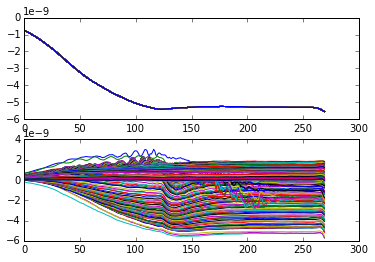

In [1278]:
bf3=[]
for i in xrange(204):
   # dat=baseline_als(bf1[i],10,0.1,100)
    pylab.subplot(211)
    plt.plot(dat)
    bf1[i]=bf1[i]-dat
    pylab.subplot(212)
    plt.plot(bf1[i])
    signal = bf1[i]
    bf1[i] = abs(scipy.fft(signal))

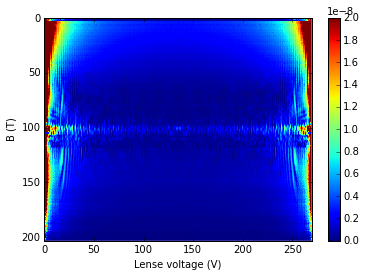

In [1279]:
p=plt.imshow(bf1,interpolation='none', aspect='auto', vmax=2E-8 )
plt.colorbar()
#plt.ylim(-1,0.7)
#plt.xlim(-15,15)
plt.xlabel("Lense voltage (V)")
plt.ylabel("B (T)")

In [1280]:
for j in xrange (204):
    for i in xrange(270):
        if i<135 :
            bf2[j,i]=bf1[j,135+i]
        else :
            bf2[j,i]=bf1[j,270-i]

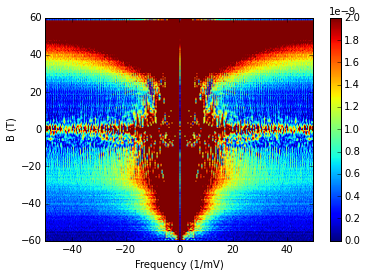

In [1289]:
p=plt.imshow(bf2,interpolation='spline16', aspect='auto', vmax=0.02E-7, extent=[-50,50,-60,60] )
plt.colorbar()

#plt.ylim(-10,10)
#plt.xlim(-15,15)
#plt.contour(bf1,20,  extent=[-59,20,-20,20] )
plt.xlabel("Frequency (1/mV)")
plt.ylabel("B (T)")
plt.savefig('/home/sergey/Documents/Bfield.pdf', format='pdf')

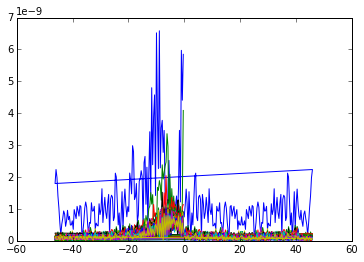

In [1265]:
t = scipy.linspace(-2,0.7,251)

for i in xrange(41):
    freqs = scipy.fftpack.fftfreq(bf1[i].size, t[1]-t[0])
    a=plt.plot(freqs, bf1[i])

In [1266]:
data=a[2].get_ydata()


IndexError: list index out of range

In [ ]:
bf2.shape[0]

In [ ]:


t = scipy.linspace(-2,0.7,251)
signal = bf1[i]

bf1[i] = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
pylab.subplot(212)
pylab.plot(freqs,FFT, )

pylab.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = np.arange(0,bf2.shape[0],1)
y = np.arange(0,bf2.shape[1],1)

xs, ys = np.meshgrid(x, y)
bf2=np.array(bf2).reshape(y.size,x.size)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, bf2,vmin=1E-8)
plt.show()